# The rudimental algorithm: linear regression 

*Author: Aleksandra Pestka*

A **linear regression** problem is one where you have to predict the value of one **continuous** variable, given the value of one or more other variables (data points), for example, predicting the selling price of a house.

## Problem statement

In this notebook, we will construct an artificial dataset: data points concentrated along some defined line, then we will use Tensorflow to find this line. 



In [121]:
!pip install tensorflow-gpu==2.0.0.a0

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Initialize important constants, as follows:

In [0]:
nr_examples = 100
epochs= 200
learning_rate = 0.01
m, c = -3.0, 1.5 #slope and intercept

Generate some training data points: **inputs** and **outputs**

In [0]:
X = np.random.normal(size=1000)
noise = np.random.normal(size=1000)
y = m*X + c + noise 

Divide them into **training** and **testing** datasets:

In [0]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y, test_size=0.4, random_state=42)

In [134]:
X_train.shape, y_train.shape

((600,), (600,))

Let's plot these raw values.

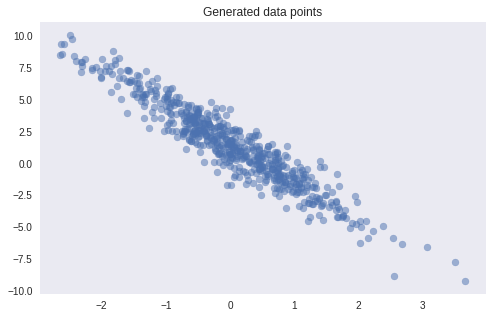

In [126]:
plt.figure(figsize=(8,5))
plt.scatter(X_train,y_train, alpha=0.5)
plt.title("Generated data points")
plt.grid()
plt.show()

Let's initialize weight and bias using **tf.Variable()** .

In [0]:
W = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

Define loss function : **mean squared error**.

In [0]:
def loss(X, y, weight, bias):
  y_hat = weight*X + bias
  error = y - y_hat 
  squared_error = tf.square(error)
  mean_error = tf.reduce_mean(input_tensor=squared_error)
  return mean_error # return overall mean of squared error, scalar value

Write a function to calculate the derivatives (gradients) of our loss with respect to our weight and bias.

In [0]:
def gradient(X, y, weight, bias):
  # gradient tape is needed by eager mode to keep track of what operations to calculate gradients of 
  with tf.GradientTape() as tape:
         current_loss = loss(X, y, weight, bias)
  return tape.gradient(current_loss, [weight, bias])

It's high time for our main training loop.

In [130]:
for epoch in range(epochs):
  delta_W, delta_b = gradient(X_train, y_train, W, b)
  change_W = delta_W * learning_rate
  change_b = delta_b * learning_rate
  W.assign_sub(change_W) #update W
  b.assign_sub(change_b) #update b
  
  if epoch%5 == 0:
    print("Loss at epoch {} : {:.5f}".format(epoch, loss(X_train, y_train, W, b)))

Loss at epoch 0 : 19.05960
Loss at epoch 5 : 15.71959
Loss at epoch 10 : 12.99814
Loss at epoch 15 : 10.78066
Loss at epoch 20 : 8.97381
Loss at epoch 25 : 7.50153
Loss at epoch 30 : 6.30185
Loss at epoch 35 : 5.32430
Loss at epoch 40 : 4.52773
Loss at epoch 45 : 3.87863
Loss at epoch 50 : 3.34969
Loss at epoch 55 : 2.91867
Loss at epoch 60 : 2.56743
Loss at epoch 65 : 2.28120
Loss at epoch 70 : 2.04795
Loss at epoch 75 : 1.85787
Loss at epoch 80 : 1.70297
Loss at epoch 85 : 1.57673
Loss at epoch 90 : 1.47386
Loss at epoch 95 : 1.39002
Loss at epoch 100 : 1.32169
Loss at epoch 105 : 1.26601
Loss at epoch 110 : 1.22063
Loss at epoch 115 : 1.18364
Loss at epoch 120 : 1.15350
Loss at epoch 125 : 1.12893
Loss at epoch 130 : 1.10891
Loss at epoch 135 : 1.09259
Loss at epoch 140 : 1.07929
Loss at epoch 145 : 1.06844
Loss at epoch 150 : 1.05961
Loss at epoch 155 : 1.05241
Loss at epoch 160 : 1.04654
Loss at epoch 165 : 1.04175
Loss at epoch 170 : 1.03785
Loss at epoch 175 : 1.03467
Loss at ep

In [131]:
print("Final loss: {:.3f}".format(loss(X_train, y_train, W, b)))
print("W = {:.4f}, b = {:.4f}".format(W.numpy(), b.numpy()))
print("Compared with m = {:.3f}, c = {:.3f}".format(m, c)," of the original line")

Final loss: 1.026
W = -2.8811, b = 1.4308
Compared with m = -3.000, c = 1.500  of the original line


Test our regression model with **test** set.

In [135]:
y_hat = W * X_test + b
print("Test loss: {:.3f}".format(loss(X_test, y_test, W, b)))

Test set loss: 1.085


If the loss for the test set is almost the same as for training set (or slightly higher) - that's good news! 

Take a look at results on the plot.

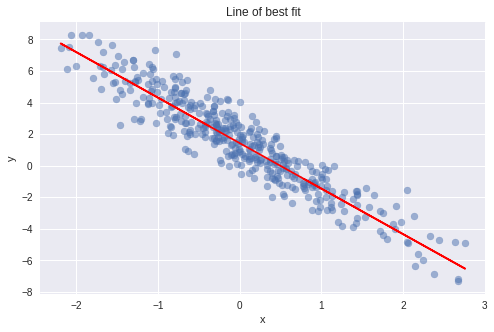

In [136]:
plt.figure(figsize=(8,5))
plt.scatter(X_test,y_test, alpha=0.5)
plt.plot(X_test, y_hat, color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Line of best fit")
plt.show()

As you can see - after 200 epochs the line of best fit is quite well fitted!

# Sources

- Tensorflow-2.0-Quick-Start-Guide
- https://www.tensorflow.org/versions/r2.0/api_docs/python/tf